# 🧭 Mapping Intersections Between Petroleum Pipelines and Tribal Lands

Welcome to this hands-on mapping activity! In this notebook, you will work with public datasets, calculate areas where different land uses overlap, and build an interactive web map using open-source geospatial tools.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/asivitskis/EarthInquiryLab/blob/main/1%20-%20Burn%20Severity%20Mapping%20with%20LeafMap/EI1%20-%20Wildfire%20Analysis%20Lesson.ipynb
)

[![Binder](https://mybinder.org/badge_logo.svg)](
https://mybinder.org/v2/gh/asivitskis/EarthInquiryLab/main?urlpath=lab/tree/1%20-%20Burn%20Severity%20Mapping%20with%20LeafMap/EI1%20-%20Wildfire%20Analysis%20Lesson.ipynb
)

This activity uses a **critical cartography** lens. That means we slow down, ask careful questions, and recognize that maps are not neutral. Every map is shaped by choices, power, and history. As critical educators and learners, our role is to practice care, humility, and responsibility when working with data related people and place.

## Learning Goals

By the end of this notebook, you will be able to:
- Access and plot publicly available vector geospatial data
- Perform basic spatial analysis, including calculating areas of intersection
- Use interactive web maps to explore geographic patterns
- Practice ethical mapping principles when working with data

<img src="Images/StandingRockSioux_DakotaAccess_TeacherResources_NatMuseumofAmericanIndian.jpg" alt="My Image" width="600px">

<p><em>Image Credit: <a href="https://americanindian.si.edu/nk360/plains-treaties/dapl" target="_blank">National Museum of the American Indian</a></em></p>

## 📦❓ Step 1. Ask Questions and Install Python Packages

Across the North American continent, petroleum pipelines often cross, border, or pass near the lands of Indigenous nations. These routes are not random - they grow out of long histories of settlement, extraction and what scholars call "invasive infrastructure." As anthropologis Anne Spince (2018) explains, pipelines are note just pieces of equipment. They are part of a continuing system that can reshape Indigenous homelands and enable the movement of resources away from places they originate. These actions take the form of carrying oil and gas across lands that hold deep cultural, ecological, and economic significance. 

Legal scholar Guillermo J. Garcia Sanchez (2020) also describes how these projects often bring competing ideas into conflict: the alotted rights of coprorations to extract and transport resources versus the rights of Indigenous communities to give or withold free, prior, and informed consent. In many cases, governments prioritize economic interests over community well-being. This occurs even when international law recognizinges Indigenous rights to meaningful participation in decisions that affect their land.

Because of this history, mapping pipeline routes alongside Tribal land boundaries is a way of asking critical questions. Importantly, this notebook will help us to ask:
 - **Where are pipelines located in relation to Tribal Lands?**
 - Where do they intersect, overlap, or come close?
 - What patterns or questions emerge when we visualize these relationships?  

In order to address this geo-inquiry question, we’ll use geospatial tools to explore these questions while keeping ethics at the center. We will follow basic principles of Tribal data sovereignty by: using only publically released datasets; not making claims about ownership, authority, or cultural interpretation; encouraging learners to understand the limits of non-tribal data sources. 


Our first step is to download some necessary python packages. Using the following codeblocks to import these packages:


In [1]:
# If running in Colab, uncomment:
#!pip install leafmap geopandas contextily pyproj -q
!pip install contextily pyproj

import leafmap
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pyproj

## 🌎 Step 2. Acquire Spatial Datasets

Our data sources for this exercise are as follows:  
        - **Pipelines:** U.S. Energy Information Administration  
          ([ESRI U.S. Federal Datasets](https://hub.arcgis.com/datasets/fedmaps::crude-oil-trunk-pipelines-2/about))  
        - **Federally Recognized Tribal Lands:** Bureau of Indian Affairs  
          ([American Conservation and Stewardship Atlas](https://services.arcgis.com/U7I2hMhPtOeGx0fs/arcgis/rest/services/Land_Areas_of_Federally_Recognized_Tribes/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson)) 
    
Note: All data are for illustrative and educational purposes only. When we calculate **Intersections** between these datasets, that ouput represents spatial overlaps between publicly available federal datasets of pipeline routes and federally recognized Tribal land areas. They are meant to illustrate proximity and patterns, not to assert any claims about land ownership, legal authority, or environmental impact. For any decision-making or consultation, authoritative data from Tribal governments should be used.

We can use the pacakge GeoPandas to load theses datsets.

In [2]:
# Set data sources
pipeline_url = (
    "https://services2.arcgis.com/FiaPA4ga0iQKduv3/arcgis/rest/services/Crude_Oil_Trunk_Pipelines_1/"
    "FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
)
tribal_url = (
    "https://services.arcgis.com/U7I2hMhPtOeGx0fs/arcgis/rest/services/"
    "Land_Areas_of_Federally_Recognized_Tribes/FeatureServer/0/"
    "query?outFields=*&where=1%3D1&f=geojson"
)

In [3]:
# Load data sources
def load_data():
    pipe_gdf = gpd.read_file(pipeline_url)
    tribal_gdf = gpd.read_file(tribal_url)
    pipe_gdf = pipe_gdf.to_crs(epsg=4326)
    tribal_gdf = tribal_gdf.to_crs(epsg=4326)
    return pipe_gdf, tribal_gdf

pipeline_gdf, tribal_gdf = load_data()

## 📚 Step 3. Visualize Tribal Land Boundaries and Petroleum Pipelines

Reviewing the data is an important step prior to analysis. Use the following code to...

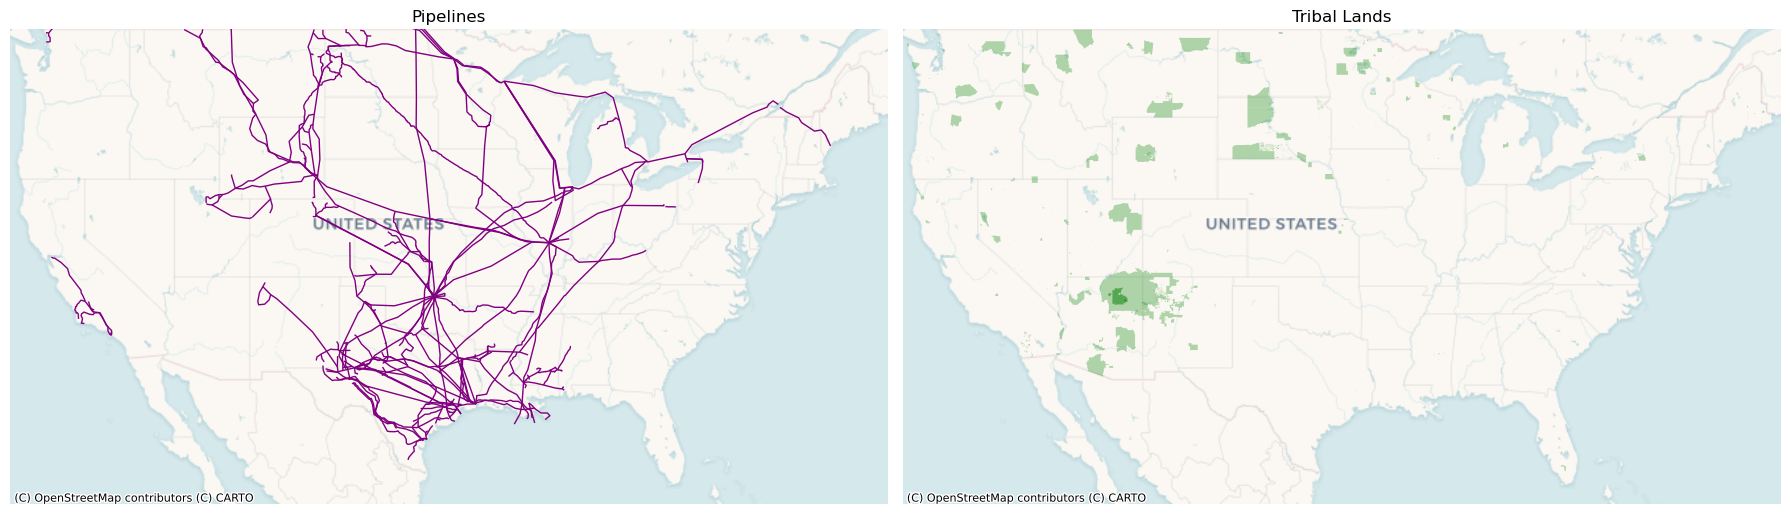

In [4]:
#Plot the data to review
# ---- Compute CONUS bounds in Web Mercator (EPSG:3857) ----
conus_lonmin, conus_latmin = -125, 24
conus_lonmax, conus_latmax = -66.5, 49

transformer = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
minx, miny = transformer.transform(conus_lonmin, conus_latmin)
maxx, maxy = transformer.transform(conus_lonmax, conus_latmax)

# ---- Simple plotting block ----
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Pipelines
pipeline_web = pipeline_gdf.to_crs(epsg=3857)
pipeline_web.plot(ax=axes[0], color="purple", linewidth=1)
ctx.add_basemap(axes[0], source=ctx.providers.CartoDB.Voyager)
axes[0].set_title("Pipelines")

# Tribal Lands
tribal_web = tribal_gdf.to_crs(epsg=3857)
tribal_web.plot(ax=axes[1], color="green", alpha=0.3)
ctx.add_basemap(axes[1], source=ctx.providers.CartoDB.Voyager)
axes[1].set_title("Tribal Lands")

# ---- Apply identical CONUS extent to both maps ----
for ax in axes:
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

## 🔬 Step 4. Analyze the Data to Calculate Areas of Intersection

Now that we have our Tribal Boundary and pipeline data, we can use simple geoprocessing to identify areas where they overlap.

Use the following code to...

In [5]:
# Compute Intersections
def compute_intersections(_pipe_gdf, _tribal_gdf):
    """Compute where pipelines intersect tribal land polygons."""
    try:
        intersections = gpd.overlay(_pipe_gdf, _tribal_gdf, how="intersection")
    except Exception as e:
        st.error(f"Error computing intersections: {e}")
        intersections = gpd.GeoDataFrame(geometry=[], crs=_pipe_gdf.crs)
    return intersections

intersection_gdf = compute_intersections(pipeline_gdf, tribal_gdf)


## 🗺️ Step 5. Act by Creating your own map to share the story

We can can plot all of this data interactively. Use this code to...

How might you use this map to share the story? What additional data would you want to add to this map?

In [6]:
# Plot Intersections on an Interactive Map
m = leafmap.Map(center=[40, -100], zoom=4)

pipeline_style = {"color": "#b95eff", "weight": 1, "opacity": 0.8}
pipeline_hover = {"color": "#000000", "weight": 3, "opacity": 1}

tribal_style = {"color": "#00704A","fillColor": "#00704A", "fillOpacity": 0.2,
        "weight": 1,
    }
tribal_hover = {"color": "#004d33", "weight": 2, "fillOpacity": 0.3}

intersection_style = { "color": "#ff8c00","weight": 4, "opacity": 1,
                          "fillColor": "#ffa500",
                          }
intersection_hover = {"color": "red", "weight": 5, "opacity": 1}

    # Add layers

m.add_gdf(
          pipeline_gdf,
          style=pipeline_style,
          hover_style=pipeline_hover,
          layer_name="Pipelines",
        )

m.add_gdf(
            tribal_gdf,
            style=tribal_style,
            hover_style=tribal_hover,
            layer_name="Tribal Lands",
        )


m.add_gdf(
            intersection_gdf,
            style=intersection_style,
            hover_style=intersection_hover,
            layer_name="Pipeline-Tribal Intersections",
        )

legend_dict = {
        "Pipelines": "#b95eff",
        "Tribal Lands": "#00704A",
        "Intersections": "#ff8c00",
    }

m.add_legend(title="Map Key", legend_dict=legend_dict, position="bottomright")

#m.add_basemap(CartoDB.Voyager)
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

# References

Garcia Sanchez, G. J. (2020). When Drills and Pipelines Cross Indigenous Lands in the Americas. Seton Hall L. Rev., 51, 1121.

Spice, A. (2018). Fighting invasive infrastructures: Indigenous relations against pipelines. Environment and Society, 9(1), 40-56.

# Related links
[Tribal Nations Maps](https://www.tribalnationsmaps.com/pipeline-map.html) - a map of proposed pipelines that border or are on tribal land.

[Native Lands Advocacy Project](https://nativeland.info/dashboard/us-pipelines-and-hazardous-liquid-spills-2012-2020/) - a map highlighting how hazardous spills relate to important Tribal Lands.
